In [43]:
import tensorflow as tf

In [44]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0)

In [46]:
trainImgData = train_gen.flow_from_directory("C:\\Users\\Sandeep\\OneDrive\\Desktop\\Classes and Files\\cats_and_dogs\\train", 
                                             batch_size = 32, 
                                             class_mode = 'binary',
                                             target_size = (128,128))

testImgData = test_gen.flow_from_directory("C:\\Users\\Sandeep\\OneDrive\\Desktop\\Classes and Files\\cats_and_dogs\\validation",
                                         batch_size = 32,
                                         class_mode = 'binary',
                                         target_size = (128,128))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [47]:
trainImgData.classes

array([0, 0, 0, ..., 1, 1, 1])

In [48]:
trainImgData.class_indices

{'cats': 0, 'dogs': 1}

In [49]:
trainImgData.image_shape

(128, 128, 3)

In [50]:
# Model Architecture

In [51]:
model = tf.keras.models.Sequential()

In [52]:
        # Convolution Layer 1
# Filter
# Padding

model.add(tf.keras.layers.Conv2D(32, (3,3), input_shape = trainImgData.image_shape, activation = 'relu', padding = 'same'))
          
# Pooling
          
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
          
          # Convolution Layer 2
# Filter
# Padding

model.add(tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', padding = 'same'))
          
# Pooling
          
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
          
# Flatten
          
model.add(tf.keras.layers.Flatten())
          
# ANN
          
model.add(tf.keras.layers.Dense(units = 1024, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0,25))
          
model.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))
          
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [53]:
# model Compile

In [54]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [55]:
# model Fitting

In [56]:
mdl_history = model.fit(trainImgData, validation_data = testImgData, epochs = 20)

Epoch 1/20
63/63 [==============================] - 34s 525ms/step - loss: 0.7367 - accuracy: 0.5440 - val_loss: 0.6716 - val_accuracy: 0.6070
Epoch 2/20
63/63 [==============================] - 37s 588ms/step - loss: 0.6231 - accuracy: 0.6550 - val_loss: 0.6158 - val_accuracy: 0.6510
Epoch 3/20
63/63 [==============================] - 33s 524ms/step - loss: 0.5224 - accuracy: 0.7345 - val_loss: 0.6583 - val_accuracy: 0.6370
Epoch 4/20
63/63 [==============================] - 35s 551ms/step - loss: 0.3915 - accuracy: 0.8155 - val_loss: 0.7385 - val_accuracy: 0.6330
Epoch 5/20
63/63 [==============================] - 36s 566ms/step - loss: 0.2601 - accuracy: 0.8890 - val_loss: 1.0212 - val_accuracy: 0.6570
Epoch 6/20
63/63 [==============================] - 35s 553ms/step - loss: 0.1311 - accuracy: 0.9530 - val_loss: 1.2408 - val_accuracy: 0.6480
Epoch 7/20
63/63 [==============================] - 32s 507ms/step - loss: 0.1033 - accuracy: 0.9615 - val_loss: 1.6340 - val_accuracy: 0.6260

In [58]:
mdl_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [57]:
import matplotlib.pyplot as plt

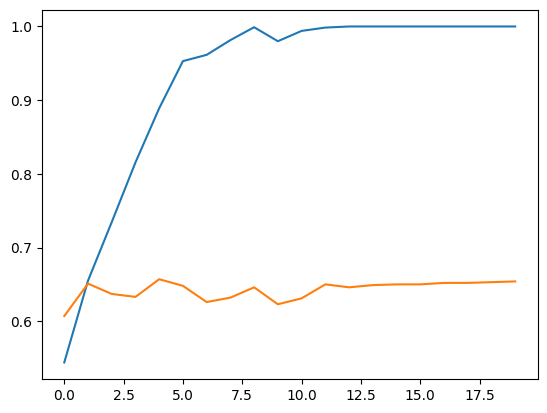

In [61]:
plt.plot(mdl_history.history['accuracy'])
plt.plot(mdl_history.history['val_accuracy'])

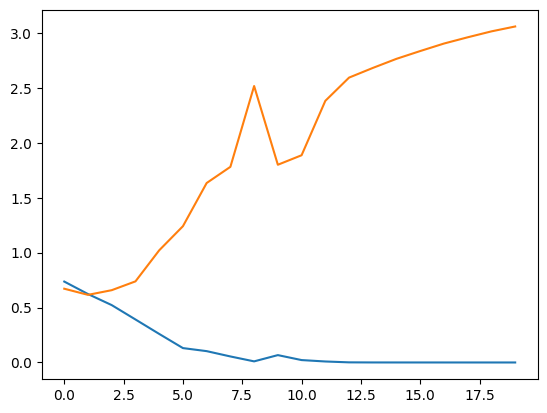

In [62]:
plt.plot(mdl_history.history['loss'])
plt.plot(mdl_history.history['val_loss'])